In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import dask 

In [2]:
m_base = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/base_model_mars/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m_albedo = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_25.19/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m_0 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_0/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m_5 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_5/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')

m_10 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_10/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m_15 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_15/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')

m_20 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_20/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m_25 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_25/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')

m_30 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_30/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m_35 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_35/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')

m_40 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_40/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m_45 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_45/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')


In [3]:
m_50 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_50/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m_55 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_55/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')

m_60 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_60/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m_65 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_65/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')

m_70 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_70/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m_75 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_75/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')

m_80 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_80/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')
m_85 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_85/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')

m_90 = xr.open_mfdataset('/export/anthropocene/array-01/sp16953/Isca_data/Mars/Albedo/albedo_90/run00[10-40]*/atmos_daily.nc', 
                       decode_times=False, concat_dim='time',combine='nested')

In [4]:
set =[m_0, m_5, m_10, m_15, m_20, m_25, m_30, m_35, m_40, m_45, m_50,
      m_55, m_60, m_65, m_70, m_75, m_80, m_85, m_90]
     
nameset= [[ '0', '5', '10', '15', '20', '25', '30', '35', '40', '45',
          '50', '55', '60', '65', '70', '75', '80', '85', '90'], set]

In [5]:
####### FUNCTIONS 
def calc_streamfn(v, p, lat):
    '''Calculates the meridional mass streamfunction from v wind.

    Parameters
    ----------
        v: an xarray DataArray of form [pressure levs, latitudes]


    Returns
    -------
        psi_xr: xarray DataArray of meridional mass streamfunction, units of kg/s
    '''
    radius = 3396000. # Mars value
    g = 3.71 # Mars value
    coeff = (2*np.pi*radius)/g

    psi = np.empty_like(v)
    # Do the integration
    for ilat in range(lat.shape[0]):
        psi[0,ilat] = coeff*np.cos(np.deg2rad(lat[ilat])) *  v[0,ilat] * p[0]
        for ilev in range(p.shape[0])[1:]:
            psi[ilev,ilat] = psi[ilev-1,ilat] + coeff*np.cos(np.deg2rad(lat[ilat])) \
                             * v[ilev,ilat] * (p[ilev]-p[ilev-1])
    # Make into an xarray DataArray
    psi_xr = xr.DataArray(psi, dims=('pfull','lat'), coords=[v.pfull.data, v.lat.data])
    psi_xr.attrs['units'] = 'kg/s'
    
    return psi_xr

# SELECTING ONE YEAR OF DATA
def annual(x, days):
    annualA = x.t_surf.sel(method='nearest').mean(dim='lon')
    start = annualA.time[-1] -days
    annualB = annualA[annualA.time>start]
    return annualB

# CALCULATING LENGTH OF POLAR SEASON - ONLY NEEDED FOR BASELINE
def pole(coord,annualB,days):
    pole=annualB.sel(lat=coord, method='nearest')
    T=160
    pole_sum=pole[pole.values>T]
    shape=len(pole_sum.time.values)
    while shape != days:        
        if shape>days:
            T+=0.01
            pole_sum=pole[pole.values>T]
            shape=len(pole_sum.time.values)
        elif shape<days:
            T-=0.01
            pole_sum=pole[pole.values>T]
            shape=len(pole_sum.time.values)
    t_i = pole_sum.time.values.min()
    t_f = pole_sum.time.values.max()
    t_l = pole_sum.time.shape

#     FINDS WHERE THE MINIMUM TIME VALUES INTO ARRAY L
#     L[0]-1 IS THE POSITION OF THE LOWEST TIME
    L = np.where(annualB.time.values ==t_i)
#     REDUCE DATA TO ONE SEASON'S WORTH    
    season = annualB[annualB.time>annualB.time.values[L[0]-1]]
    season = season[season.time<season.time.values[days]]
    return season

# GET AVERAGE POLE Td = T - Tsub AND GENERATES LIST.
# Note: Only looks at poles but throughout the time period given
def sublimation_count(coord, season, duration):
    list = []

    for time in range(duration):
    #             SOUTH POLE
        values_at_time=season.values[time] #Up to 1343
        if coord ==-90:
            first_11_values = values_at_time[0:11]
            average=np.mean(first_11_values)
            if average>147:
                average_new=average-147
                list.append(average_new)
            else:
                list.append(0)
    #             NORTH POLE
        elif coord ==90:
            last_11_values = values_at_time[53:64]
            average=np.mean(last_11_values)
            if average>147:
                average_new=average-147
                list.append(average_new)
            else:
                list.append(0)  
        
    return list
## PERFORMS A SUBLIMATION COUNT FOR THE MARTIAN NORTH POLE ( DOES NOT WORK FOR SOUTH YET)
def Martian_Base(m, coord, days):
    values = annual(m, 687)
    season = pole(coord, values, days)
    T_D = sublimation_count(coord,season,days)
    return T_D

## NORMALISED DATA RELATIVE TO MARTIAN BASE
def Plot_Data(x, normaliser):
    pole_sublime=[]
    mean=np.max(normaliser)
    pole_sublime = [(y/mean) for y in x] #TO NORMALISE
    return pole_sublime

## DATA FOR AREA RATIO PLOT
def area_ratio(x, days, time_period, coord):
    all_data = annual(x, days)
    T_D = sublimation_count(coord,all_data, time_period)
    yaxis = Plot_Data(T_D, Martian_North_Summer)
    return yaxis

## QUADRATIC FIT
def f(x, a, b, c):
    return a* x*x + b*x + c

## QUADRATIC FIT
def f3(x, a, b, c,d):
    return a* x*x*x + b*x*x + c*x +d


In [ ]:
# i=0
# for x in set:
#     y=nameset[0][i]
#     print(y)
#     i+=1
x=m_base

if __name__ == '__main__':
    ds = x
    vz = ds.vcomp.mean(dim='lon')
    psi = calc_streamfn(vz[0,:], ds.pfull.data, ds.lat.data)
    psi.plot.pcolor()
    plt.show()
    psi.plot.contourf(10, vmin= psi.values.min() ,vmax= psi.values.max())
    plt.show()
    psi.plot.contourf()
    plt.show()
                      
    

In [6]:
###### AREA RATIO METHOD PLOT

# CREATE REFERENCE VALUES
Martian_North_Summer = Martian_Base(m_albedo, 90, 179)

25.19


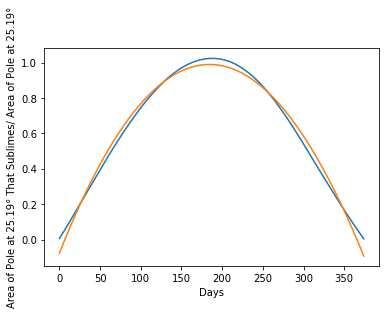

Optimal parameters are a=3.13494e-09, b=-3.24948e-05, and c=0.0116708 and d=-0.0766032
(236.1803181388812, 2.639460246516123e-12)
5
10


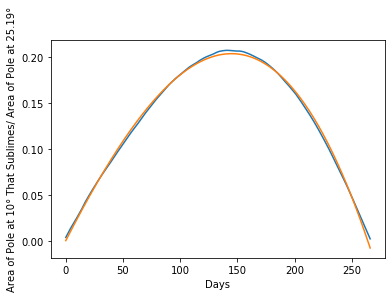

Optimal parameters are a=-1.76315e-08, b=-4.58346e-06, and c=0.00243646 and d=0.000576235
(35.51821791035143, 3.9464525881654396e-13)
15


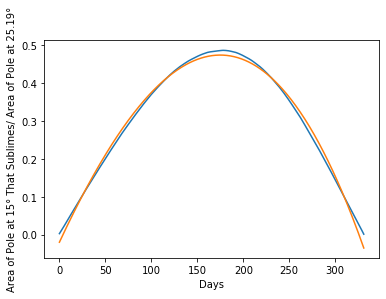

Optimal parameters are a=-1.44053e-08, b=-1.11022e-05, and c=0.00520677 and d=-0.0195298
(101.292150386202, 1.1283017926024337e-12)
20


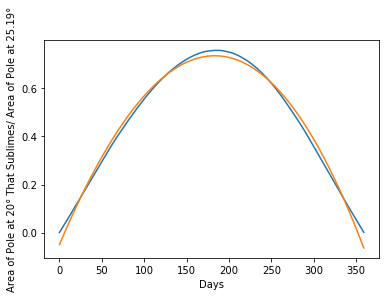

Optimal parameters are a=-6.86401e-09, b=-2.089e-05, and c=0.00834425 and d=-0.0496201
(169.14031118694732, 1.888244295882591e-12)
25


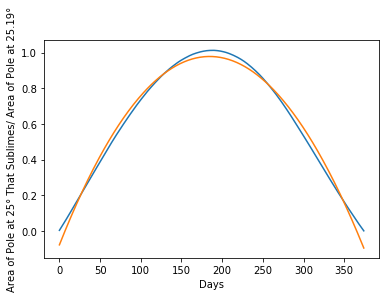

Optimal parameters are a=2.81222e-09, b=-3.20315e-05, and c=0.0115388 and d=-0.0777842
(232.99979784916115, 2.6049879602416106e-12)
30


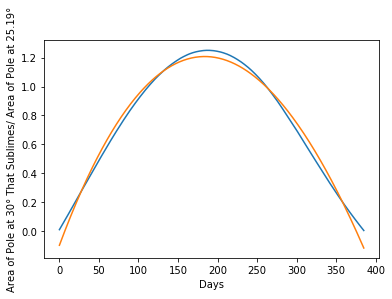

Optimal parameters are a=1.53708e-08, b=-4.43486e-05, and c=0.0147462 and d=-0.0995443
(295.24871569611764, 3.301563035630825e-12)
35


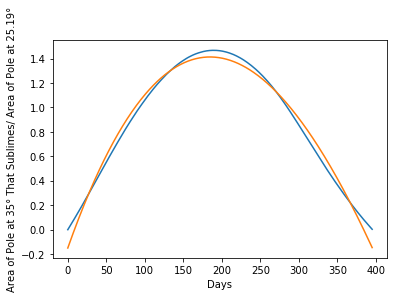

Optimal parameters are a=2.70151e-08, b=-5.58579e-05, and c=0.0178572 and d=-0.149744
(350.69218550051494, 3.929338522845401e-12)
40


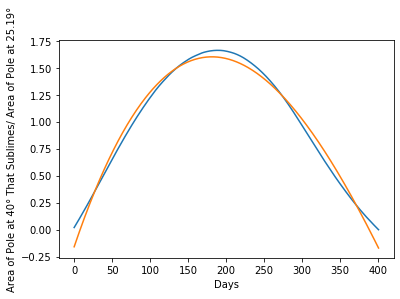

Optimal parameters are a=4.15518e-08, b=-6.85067e-05, and c=0.020761 and d=-0.157398
(402.0417042318991, 4.502926525778509e-12)
45


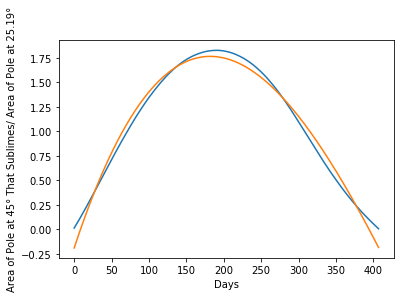

Optimal parameters are a=5.05802e-08, b=-7.747e-05, and c=0.0231667 and d=-0.189822
(447.3064808657726, 5.0127573703800955e-12)
50


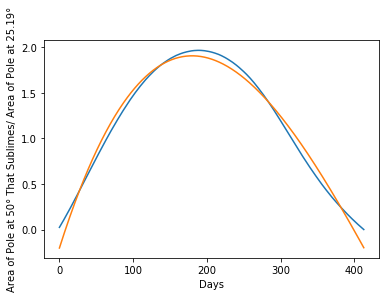

Optimal parameters are a=6.37748e-08, b=-8.81126e-05, and c=0.0255207 and d=-0.202747
(487.4128429211172, 5.463243793774341e-12)
55


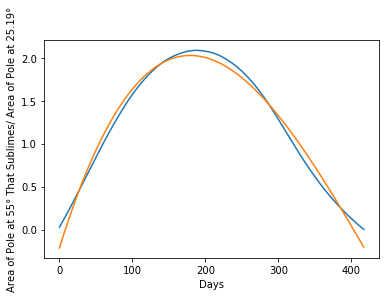

Optimal parameters are a=7.31291e-08, b=-9.62012e-05, and c=0.027423 and d=-0.215307
(521.8545698607049, 5.8487270169615175e-12)
60


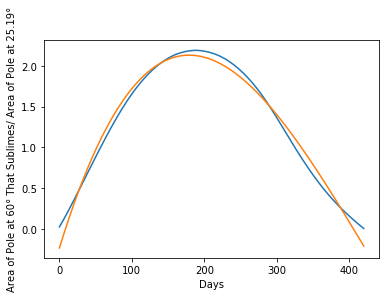

Optimal parameters are a=8.00735e-08, b=-0.000102642, and c=0.0290431 and d=-0.234866
(550.7879865038373, 6.173870183430449e-12)
65


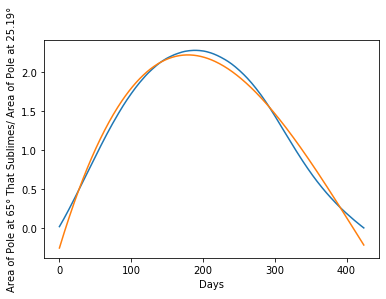

Optimal parameters are a=8.66382e-08, b=-0.000108376, and c=0.0304671 and d=-0.256331
(576.0886335366012, 6.461248984979548e-12)
70


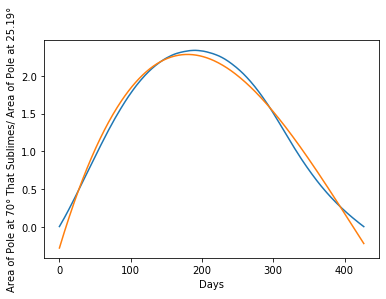

Optimal parameters are a=9.01761e-08, b=-0.000111922, and c=0.0314883 and d=-0.280689
(595.4533803602827, 6.6814915489523876e-12)
75


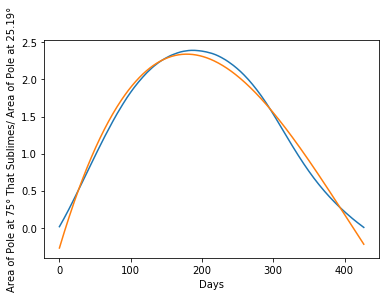

Optimal parameters are a=9.46074e-08, b=-0.000115687, and c=0.0322687 and d=-0.270663
(609.9796200686285, 6.839042942050764e-12)
80


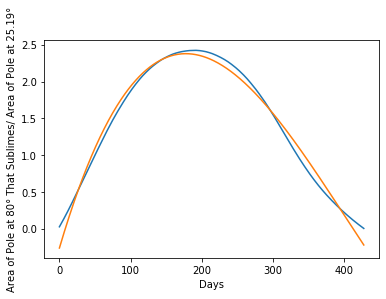

Optimal parameters are a=9.84845e-08, b=-0.000118644, and c=0.0328353 and d=-0.261394
(620.8651696471735, 6.958327024192336e-12)
85


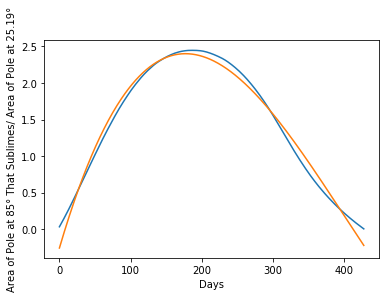

Optimal parameters are a=1.00391e-07, b=-0.000120229, and c=0.0331516 and d=-0.256381
(626.5632930481179, 7.02042223681464e-12)
90


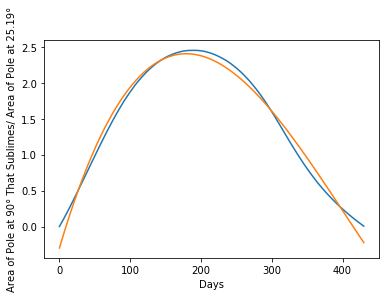

Optimal parameters are a=9.90515e-08, b=-0.000119853, and c=0.0333973 and d=-0.298892
(629.0398182882478, 7.057374229893302e-12)
[1.0, 0.1503860194204059, 0.42887633984233664, 0.7161490530616005, 0.9865335083177854, 1.2500987297447133, 1.4848493230257116, 1.7022659102164743, 1.893919376477183, 2.0637318416791346, 2.209559941204917, 2.33206556263489, 2.4391898447602376, 2.5211812104094893, 2.5826860801751566, 2.6287760747366167, 2.6529022315893385, 2.663387970873819]


ValueError: x and y must have same first dimension, but have shapes (19,) and (18,)

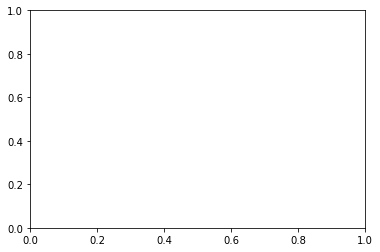

In [10]:
# CREATE PLOT DATA - CUBIC FIT WITH INTEGRATION
from scipy.optimize import curve_fit
from scipy.integrate import quad 
i=0

area=[]

set =[m_albedo, m_5, m_10, m_15, m_20, m_25, m_30, m_35, m_40, m_45, m_50,
      m_55, m_60, m_65, m_70, m_75, m_80, m_85, m_90]
     
nameset= [['25.19', '5', '10', '15', '20', '25', '30', '35', '40', '45',
          '50', '55', '60', '65', '70', '75', '80', '85', '90'], set]

for x in set:
    test=[]
    y=nameset[0][i]
    print(y)
    data = area_ratio(x, 1300, 1000, 90)
    data1=data[100:700]
    for x in data1:
        if x==0:
            data1.remove(x)
        else:
            test.append(x)
    xaxis = range(0,len(test),1)

    plt.xlabel('Days')
    plt.ylabel('Area of Pole at '+y+'° That Sublimes/ Area of Pole at 25.19°')    
    i+=1
    
    if len(test) != 0:
    
    ######################### INTEGRATING AREA #######################

        popt, pcov = curve_fit(f3,xaxis,test)
        a, b, c, d = popt
        yfitted = f3(xaxis, *popt)
        plt.plot(xaxis, test)
        plt.plot(xaxis,yfitted)
        plt.show()
        A = quad(f3, 0, len(test), args=(a,b,c,d))
        area.append(A)
        print("Optimal parameters are a=%g, b=%g, and c=%g and d=%g" % (a, b, c, d))
        print(quad(f3, 0, len(test), args=(a,b,c,d)))

    else: 
        continue
### COMBINES ALL AREAS AND ERRORS INTO LIST, CREATES RATIO RELATIVE TO 25.19 AND PLOTS GRAPH FOR ANALYSIS

Area = []
Error = []
for x in area:
    A = x[0]
    Area.append(A)
    E = x[1]
    Error.append(E)
    
Ratio = [x/Area[0] for x in Area]
print(Ratio)

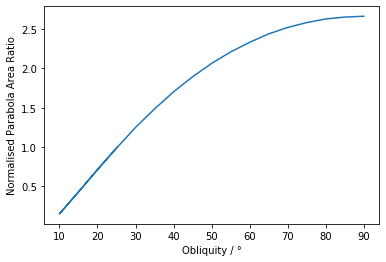

slope: 3.015886    intercept: -0.297763
R-squared: 0.997070


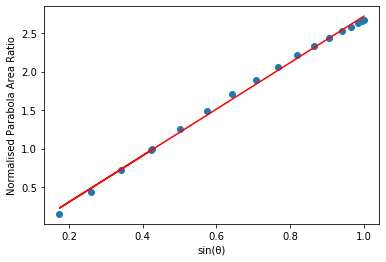

In [15]:
Obliq = [25.19, 10,15,20,25, 30, 35, 40, 45, 50, 55, 60,65,70,75,80,85,90]
plt.plot(Obliq, Ratio)
plt.xlabel('Obliquity / °')
plt.ylabel('Normalised Parabola Area Ratio')

plt.show()

sin = [np.sin(x*np.pi/180) for x in Obliq]
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(sin, Ratio)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
line = [intercept + slope*x for x in sin]

plt.plot(sin, Ratio, 'o')
plt.plot(sin, line , 'r')
plt.xlabel('sin(\u03B8)')
plt.ylabel('Normalised Parabola Area Ratio')
plt.show()

slope: 6.968908    intercept: 182.163779
R-squared: 0.996537


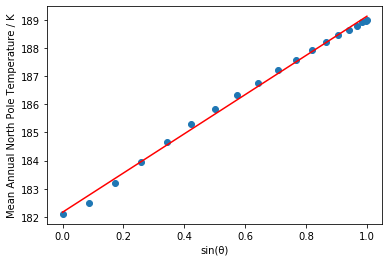

In [5]:
#################### PLOT OF NORTH POLE TEMPERATURE AGAINST SIN(THETA) WITH LINE OF BEST FIT ####################

Values =[]
for x in set:
    x=x.t_surf.sel(method='nearest').mean(dim='lon')
    data = x[x.time>x.time.values[1030]]
    data = data[data.time.values < data.time.values[179]]
    data=data.values[57:64]
    data=data.mean()
    Values.append(data)

Obliq = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60,65,70,75,80,85,90]

sin = [np.sin(x* np.pi/180) for x in Obliq]

from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(sin, Values)
print("slope: %f    intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
line = [intercept + slope*x for x in sin]

plt.plot(sin, Values, 'o')
plt.plot(sin, line , 'r')
plt.xlabel('sin(\u03B8)')
plt.ylabel('Mean Annual North Pole Temperature / K')
plt.show()



# plt.plot(Obliq, Values)
# plt.ylabel('Mean Annual North Pole Temperature / K')
# plt.xlabel('Obliquity / \u03B8')

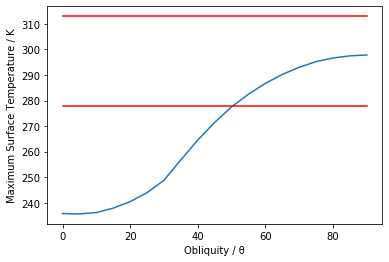

In [17]:
######################## MAX T_S AGAINST OBLIQUIUTY #####################
Max_Ts =[]

for x in set:
    data = annual(x, 1300)
    max_val = data.values.max() 
    Max_Ts.append(max_val)
    
# Habitable btwn 5 and 40 degrees
habitable1 = [278 for x in Obliq] 
habitable2 = [313 for x in Obliq] 

plt.plot(Obliq, Max_Ts)
plt.plot(Obliq, habitable1, 'r')
plt.plot(Obliq, habitable2, 'r')

plt.ylabel('Maximum Surface Temperature / K')
plt.xlabel('Obliquity (\u03B8) / °')
plt.show()

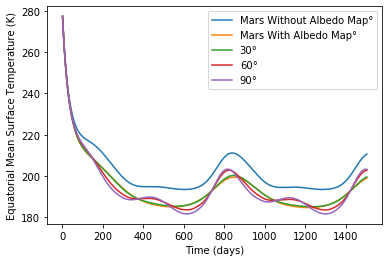

In [8]:
###################### GMST PROFILE @ EQUATOR FOR W/ ALBEDO, W/O ALBEDO, 30, 60, 90 ###############################

set =[m_base, m_albedo, m_30,
       m_60, m_90]
     
nameset= [['Mars Without Albedo Map', 'Mars With Albedo Map', 
          '30', '60', '90'], set]

i=0
for x in set:
    y=nameset[0][i]
    x=x.t_surf.sel(lon=0, method='nearest').mean(dim='lat')
#     cos_lat_2d = 1
#     np.cos(np.deg2rad(x.lat)) * xr.ones_like(x.lon) 
#     gmst = ((x.t_surf * cos_lat_2d).sum(dim=['lat','lon']) / cos_lat_2d.sum(dim=['lat','lon']))
#     print('Starting Temperature - ('+y+'°)', "%.2f" % gmst.values.max())
    plt.plot(x.time, x.values, label=y+'°')
    plt.xlabel("Time (days)")
    plt.ylabel("Equatorial Mean Surface Temperature (K)")
    i+=1
plt.legend()
plt.show()


0
228.70311
5
228.60814
10
228.27727
15
227.70557
20
226.92778
25
225.99799
30
224.82384
35
223.44595
40
221.8531
45
220.05547
50
218.05574
55
215.97249
60
213.84808
65
211.71333
70
209.63074
75
207.72311
80
207.05217
85
206.9004
90
206.78049


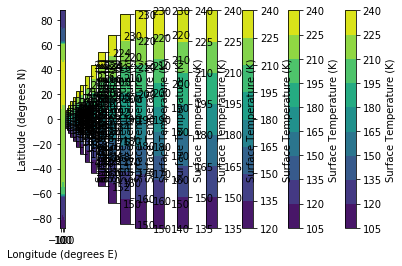

In [23]:
########################### CONTOUR TEMP PROFILES FOR FILES ###########################

i=0
for x in set:
    y=nameset[0][i]
    print(y)
    t_surf=x.t_surf.mean(dim='time')
    print(t_surf.values.max())
    X=t_surf.lon.values -180
    Y=t_surf.lat.values
    Z=t_surf.values

    CS=plt.contourf(X, Y, Z)
    plt.xlabel('Longitude (degrees E)')
    plt.ylabel('Latitude (degrees N)')
    cbar = plt.colorbar(CS)
    cbar.ax.set_ylabel('Surface Temperature (K)')
#     plt.show()
    i+=1


#     print(Z.max(), Z.min())


0


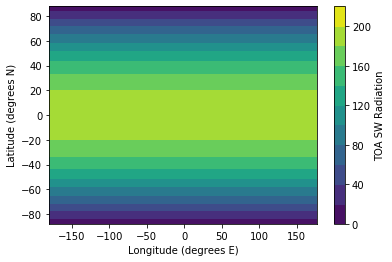

5


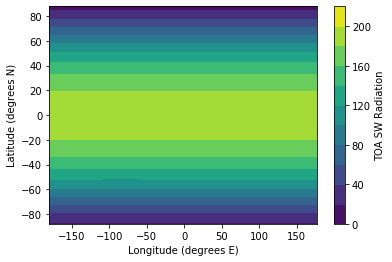

10


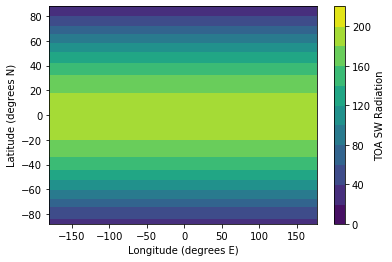

15


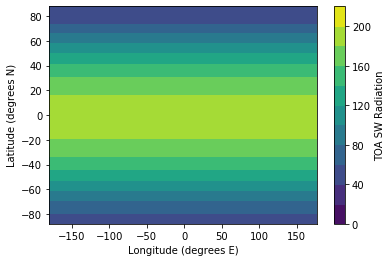

20


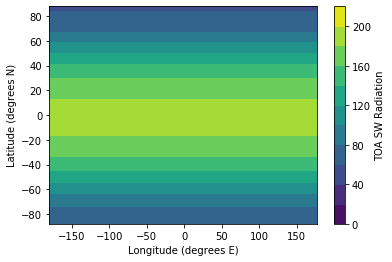

25


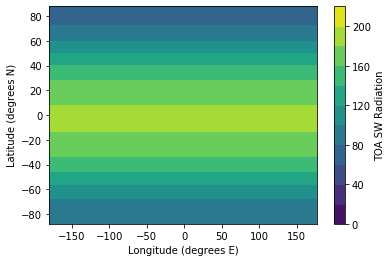

30


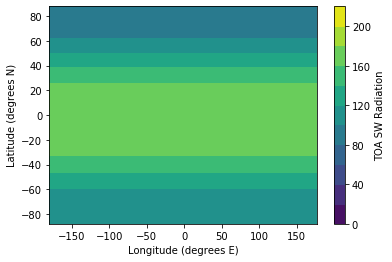

35


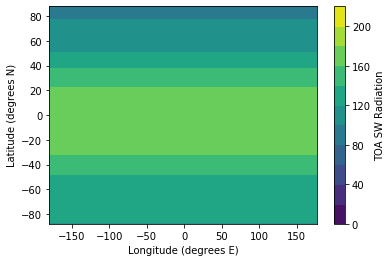

40


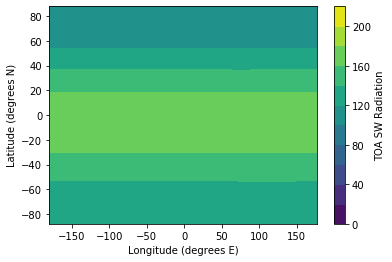

45


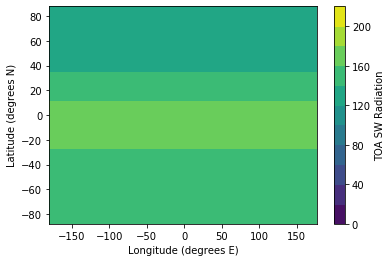

50


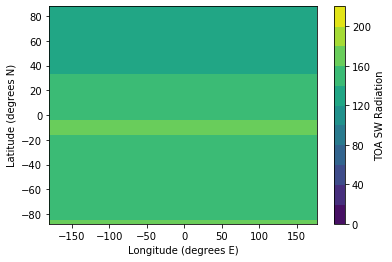

55


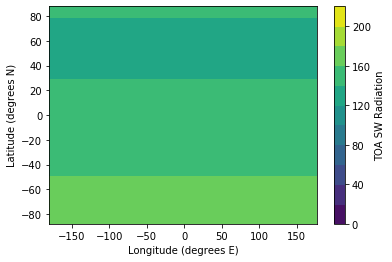

60


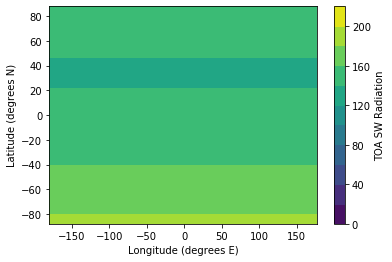

65


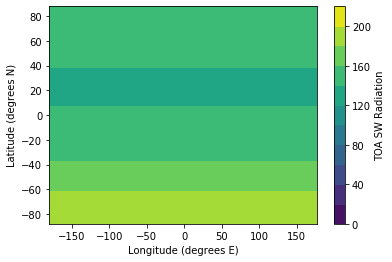

70


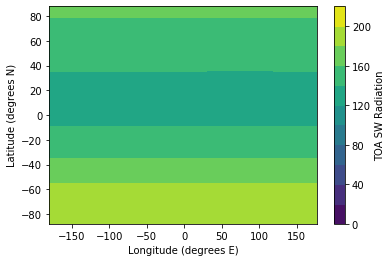

75


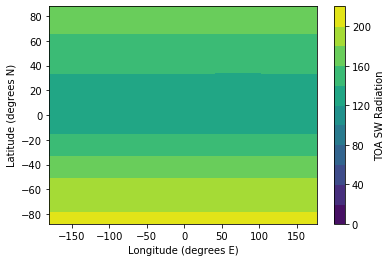

80


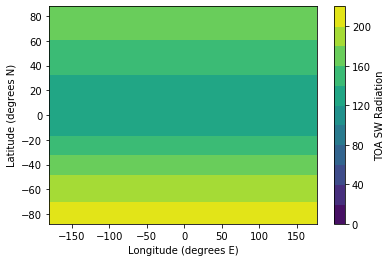

85


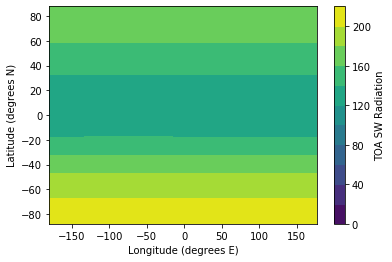

90


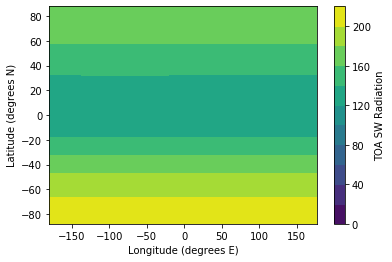

In [19]:
i=0
for x in set:
    y=nameset[0][i]
    print(y)
    t_surf=x.soc_toa_sw_down.mean(dim='time')
    X=t_surf.lon.values -180
    Y=t_surf.lat.values
    Z=t_surf.values

    CS=plt.contourf(X, Y, Z, levels=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220])
    plt.xlabel('Longitude (degrees E)')
    plt.ylabel('Latitude (degrees N)')
    cbar = plt.colorbar(CS)
    cbar.ax.set_ylabel('TOA SW Radiation')
    plt.show()
    i+=1